In [1]:
import yaml

import utils

%matplotlib inline
%load_ext autoreload
%autoreload 2


In [2]:
with open("diag_metadata.yaml", mode="r") as fptr:
    diag_metadata_list = yaml.safe_load(fptr)

In [3]:
def summary_plots(case, stream, diag_metadata):
    ds = case.history_contents[stream]
    varname = diag_metadata["varname"]
    print(varname)
    da = ds[varname].isel(diag_metadata.get("isel_dict"))

    utils.summary_plot_global_ts(ds, da, diag_metadata)

    utils.summary_plot_histogram(da, diag_metadata)


Datasets contain a total of 24 time samples
Last average written at 0003-01-01 00:00:00
POC_FLUX_100m


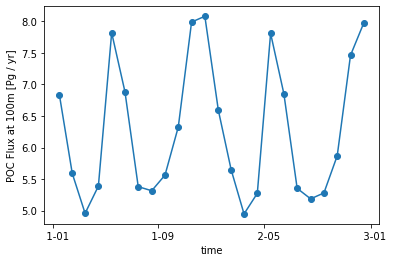

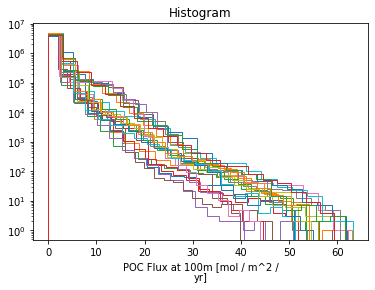

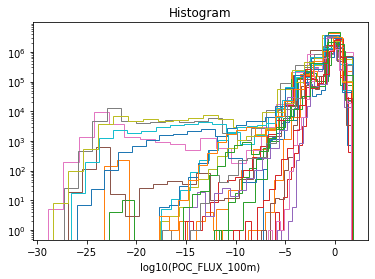

CaCO3_FLUX_100m


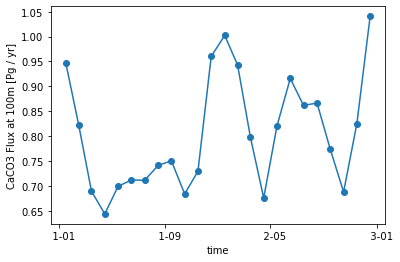

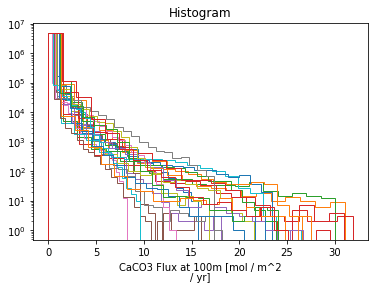

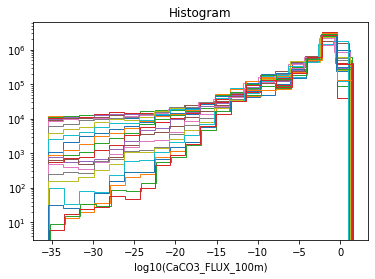

FG_CO2


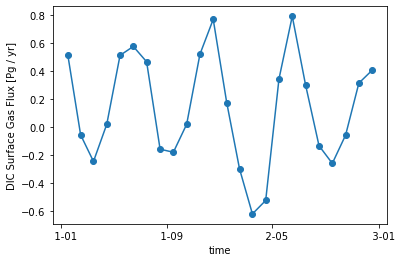

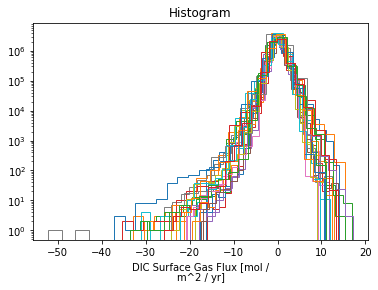

DpCO2


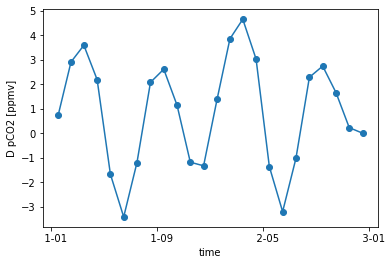

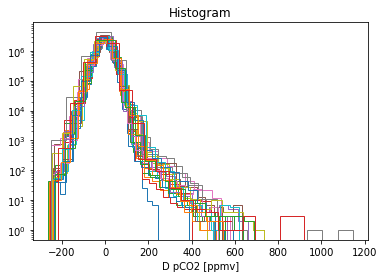

spChl


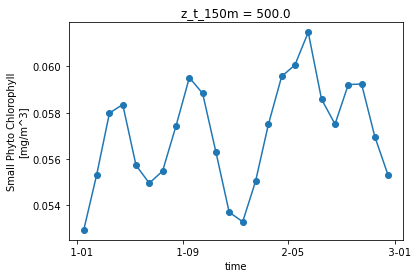

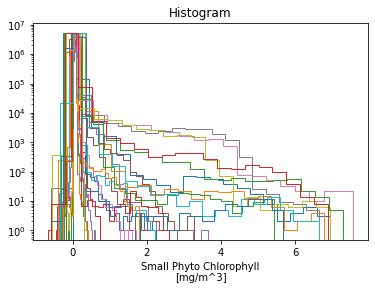

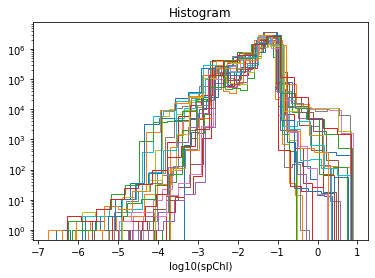

coccoChl


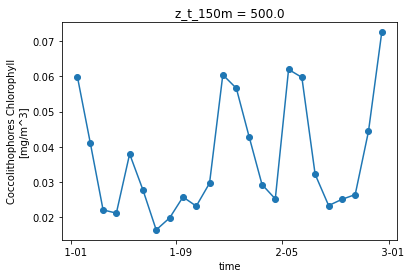

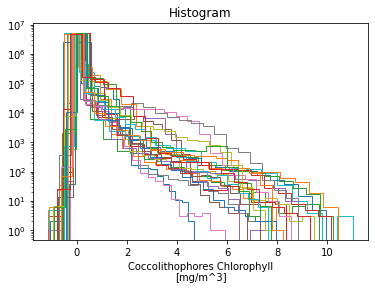

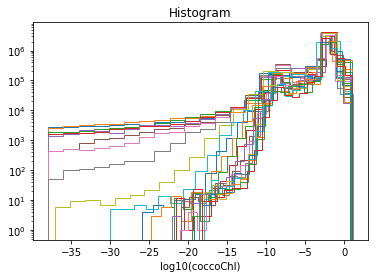

diatChl


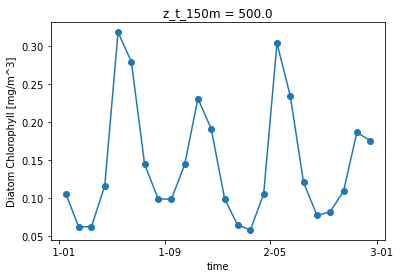

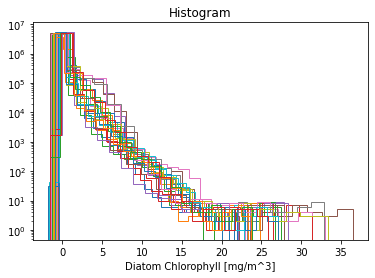

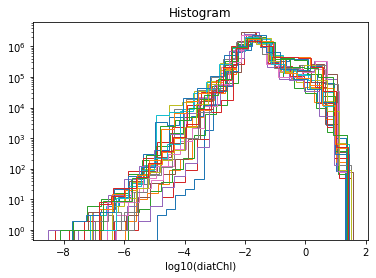

diazChl


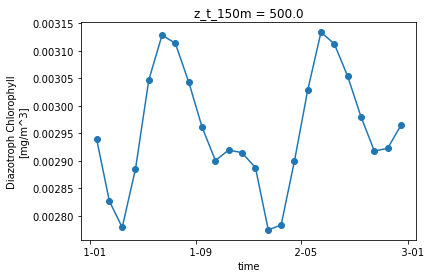

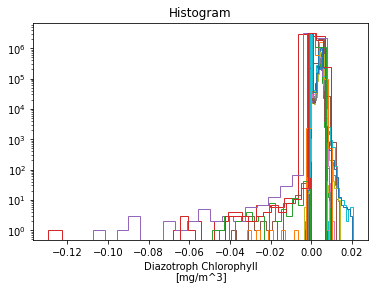

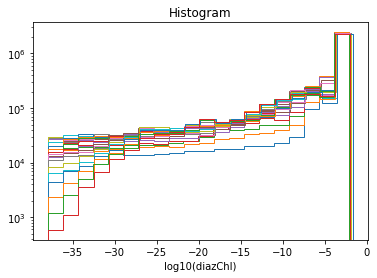

photoC_sp_zint


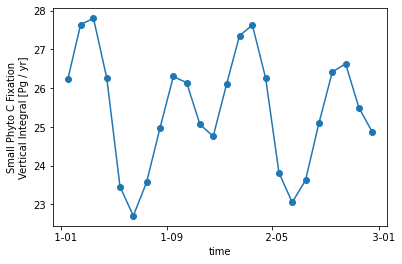

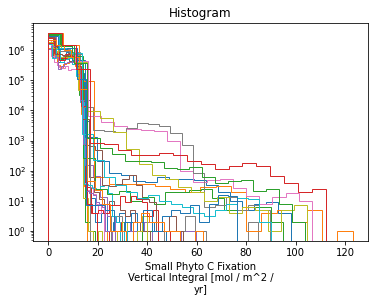

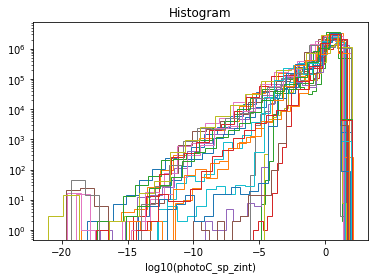

photoC_cocco_zint


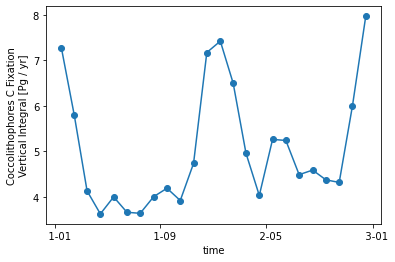

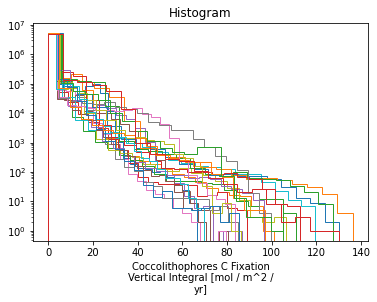

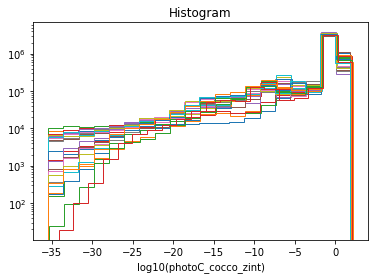

photoC_diat_zint


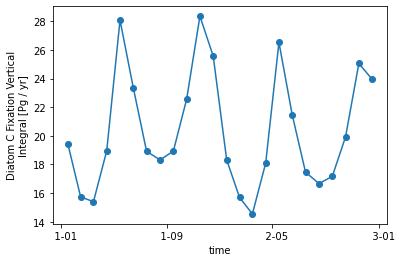

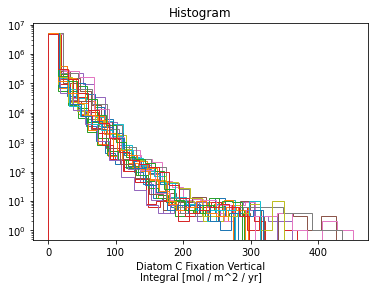

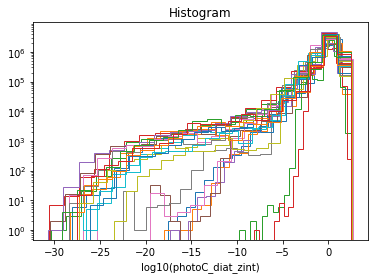

photoC_diaz_zint


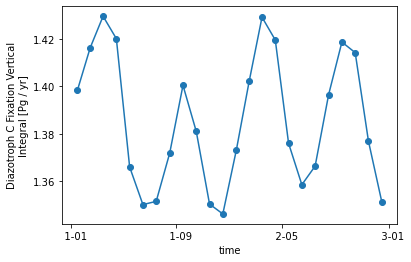

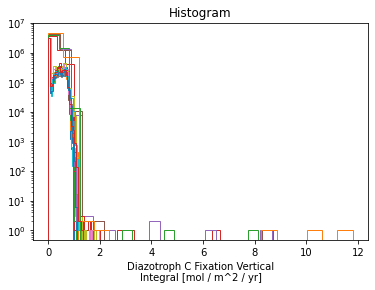

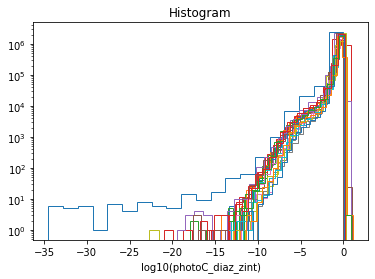

PH


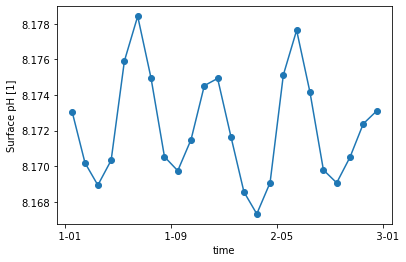

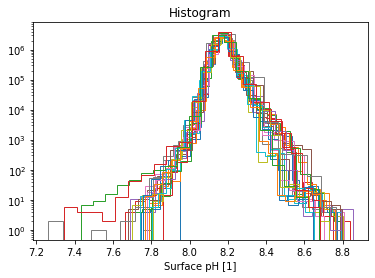

NHx_SURFACE_EMIS


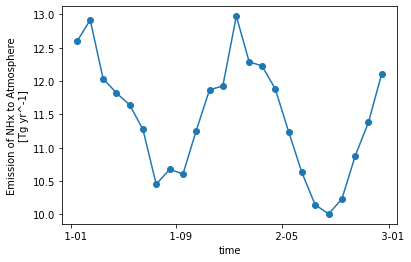

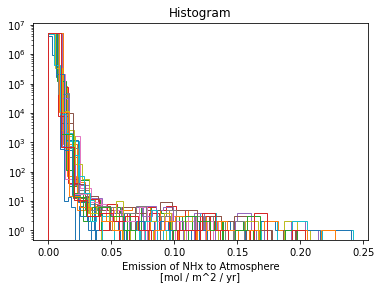

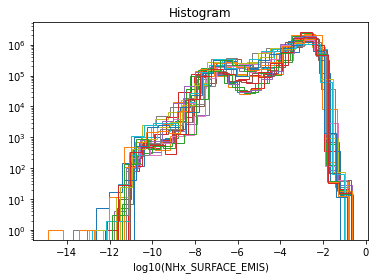

O2_ZMIN


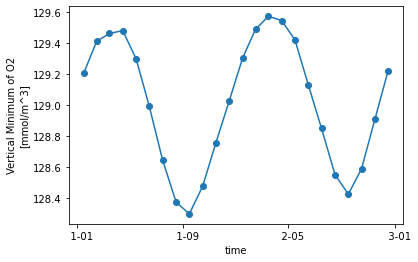

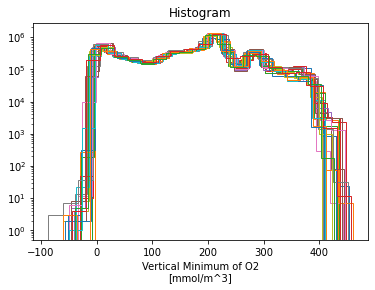

O2_ZMIN_DEPTH


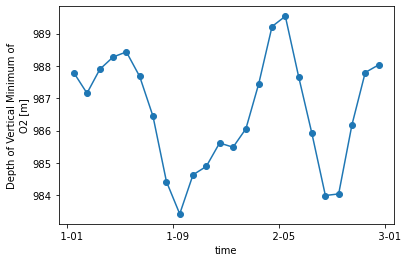

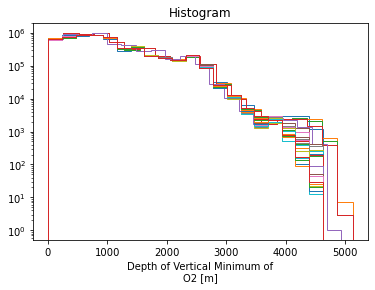

O2


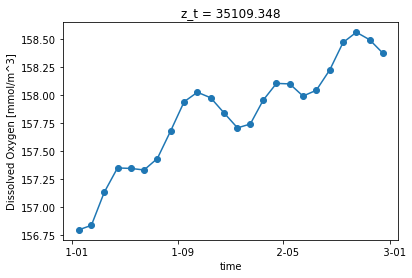

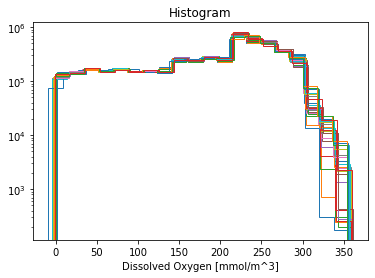

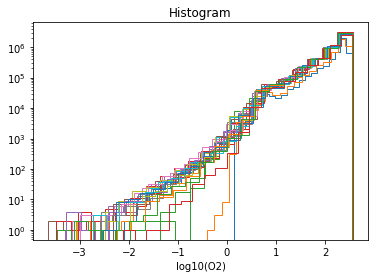

PO4


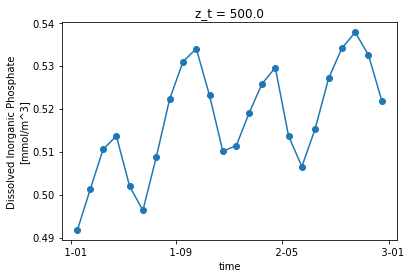

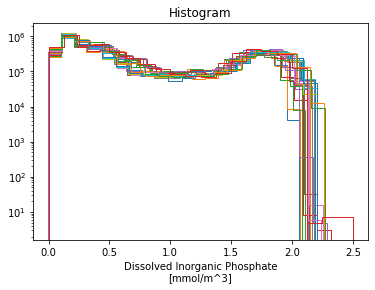

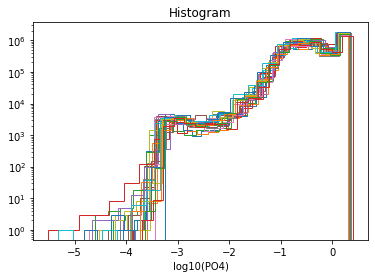

PO4


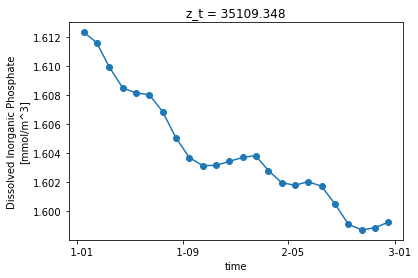

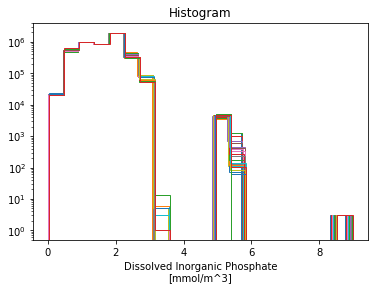

NO3


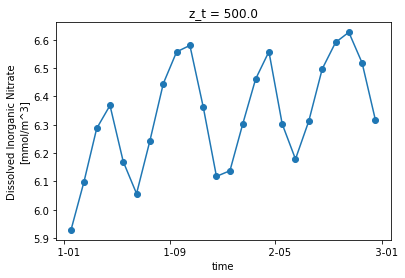

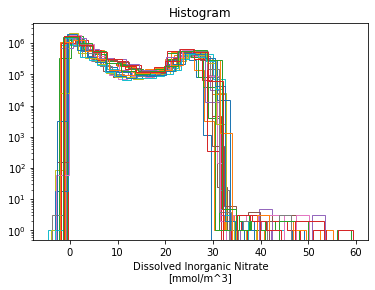

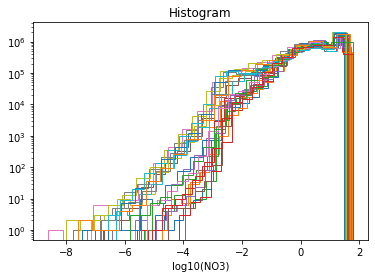

NO3


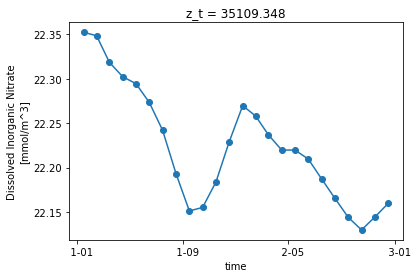

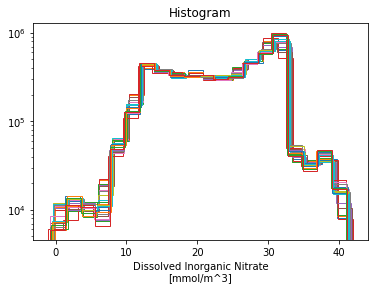

SiO3


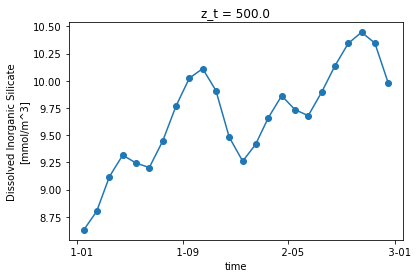

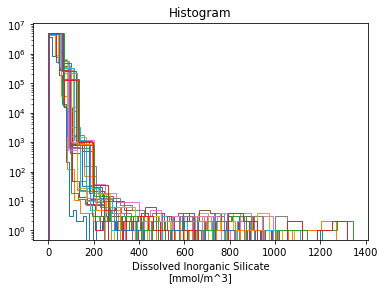

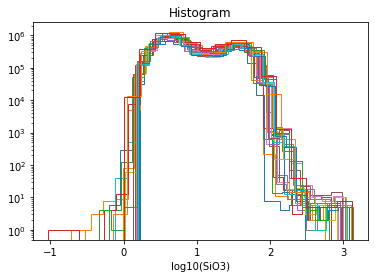

SiO3


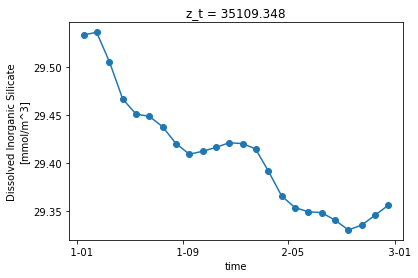

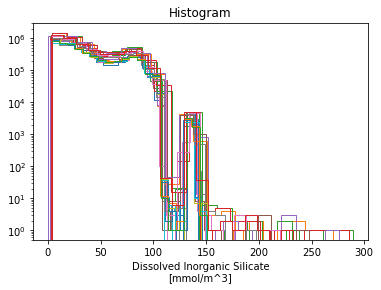

In [4]:
case = utils.CaseClass('g.e22.G1850ECO_JRA_HR.TL319_t13.004')
stream = "pop.h"
case._open_history_files(stream)
for diag_metadata in diag_metadata_list:
    summary_plots(case, stream, diag_metadata)